# Data Visualization III
                                               -By Aditya Nikam(TE AI & DS)
Use the Iris flower dataset or any other dataset into a DataFrame. Scan the
dataset and give the inference as:
    
1.List down the features and their types (e.g., numeric, nominal) available in the dataset.

2.Create a histogram for each feature in the dataset to illustrate the feature
distributions.

3.Create a box plot for each feature in the dataset.

4.Compare distributions and identify outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')#we use this to ignore the warnings means in the output warnings should not appear

C:\Users\champ\PycharmProjects\Tutorials\a\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\champ\PycharmProjects\Tutorials\a\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\champ\Downloads\IRIS.csv")#this is to import the dataset.
#The dataset is a csv file.df is the name given to the dataset
df#this is written to display the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()#it display the first five rows of the dataset.Its default value is 5

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()#It gives the summary of the dataframe and it tells how many non null values are there in each column ,what 
#is the data type of each coloumn,how many columns are there in the dataset
#Here we can See that in our dataset there are 5 coloumns where 4 coloumns have float Datatype
#1 coloumn have object data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df["species"].unique()#it prints the unique values of Species column

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.describe()#it gives the statistical information of the numeric columns of dataset

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()#This displays the number of null values in each column

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

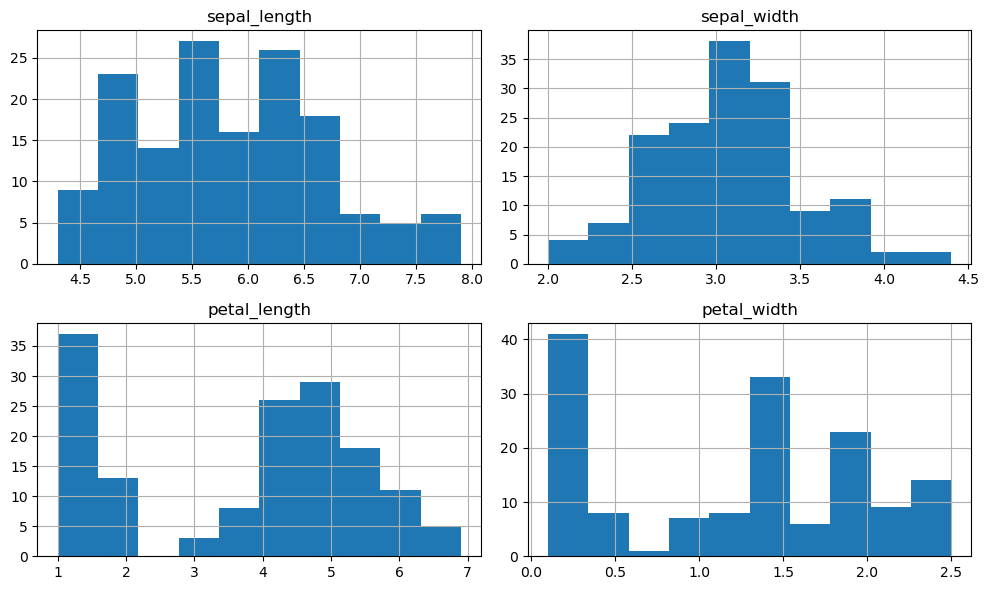

In [8]:
df.hist(figsize=(10, 6))#it sets the size of plot 10 inches wide and 6 inches tall
plt.tight_layout()#This line tells the plot to adjust the spacing between the various boxplots.
#It makes sure the plots don’t overlap or get cut off.
plt.show()#it is used to display the plots

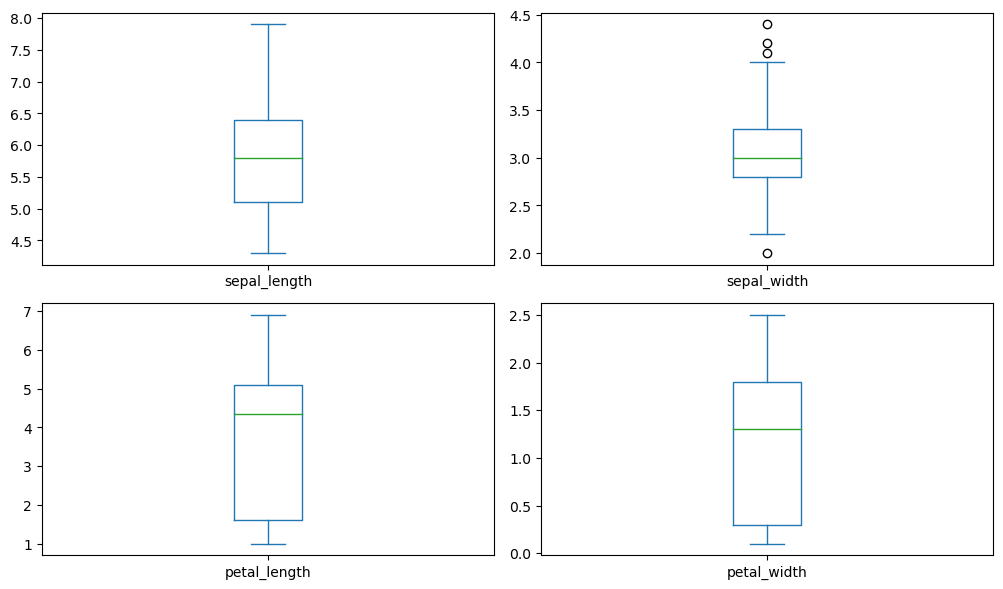

In [9]:
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,6))#in df.plot the plot function tells Python
#to make plots
#kind='box' indicate we want to make boxplots
#subplots=True means box plot will be made for each numeric column of the dataset 
#layout=(2,2) means two box plots will be made above and two below
plt.tight_layout()#This line tells the plot to adjust the spacing between the various boxplots.
#It makes sure the plots don’t overlap or get cut off.
plt.show()#it is used to display the plots

#Here we can see that only sepal_width column has outliers

<AxesSubplot:ylabel='petal_width'>

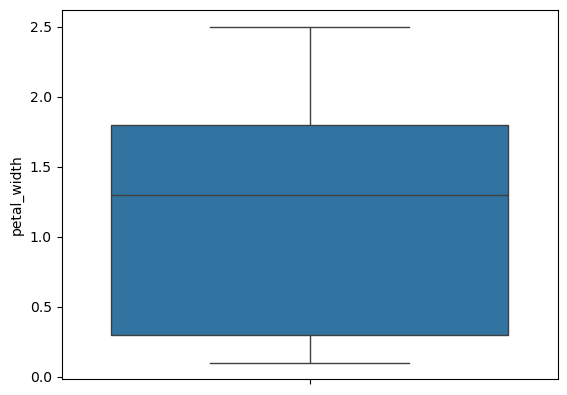

In [16]:
sns.boxplot(df['sepal_width'])#if examiner as to plot box plot for each column you can write like this command
#Here just replace the sepal_width with the other column name I have plotted box plot for sepal_width you can do for others
#not for species as it has categoricalvalues

#I am commenting this command because we have already plotted our box plots above

In [11]:
#If examiner ask to remove the detected outliers then we can remove it using the below part of code.We are using IQR method
#to remove the outlier

#Dont write this below commands until an unless the examiner says to remove the outliers.Becuase in problem statement its 
#written to identify outliers

def remove_outliers_iqr(data, column):#we are defining function remove outliers which will take our df dataset(data)
    #and column will take
    Q1 = data[column].quantile(0.25)#it calculate Q1 of current running column in for loop
    Q3 = data[column].quantile(0.75)#it calculate Q3 of current running column in for loop
    IQR = Q3 - Q1#it calculates the IQR                      
    lower_limit = Q1 - 1.5 * IQR#Formula to calculate lower bound   
    upper_limit = Q3 + 1.5 * IQR#Formula to calculate upper bound  
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]#these keeps only the rows which have
#values greater than or equal to lower limit and less than or equal to upper limit so outliers will be removed
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']#these are the numeric columns of dataset 
#whose IQR we want to find
for col in numeric_cols:#it visits each column of numeric_cols list one by one
    df = remove_outliers_iqr(df, col)#calling the remove_outliers function
    


In [12]:
df#Now you will see 146 rows and 5 columns earlier there were 150 rows so 4 rows had outliers which we removed

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


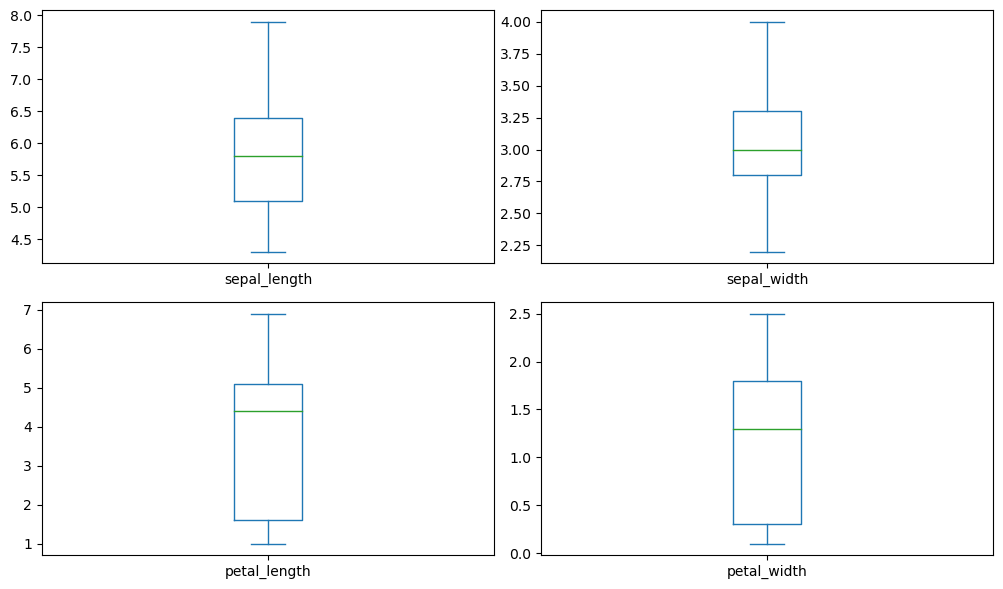

In [13]:
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,6))#in df.plot the plot function tells Python
#to make plots
#kind='box' indicate we want to make boxplots
#subplots=True means box plot will be made for each numeric column of the dataset 
# layout=(2,2) means two box plots will be made above and two below
plt.tight_layout()#This line tells the plot to adjust the spacing between the various boxplots.
#It makes sure the plots don’t overlap or get cut off.
plt.show()#it is used to display the plots
#Now you see that there are no outliers in any of the box